# Churn Prediction Analysis for a telecom company

## Problem Statement
 <i>**TASK 1:** Here we need to predict whether a customer will churn or not from this telecom company based on some historical data of that perticular customer</i>
 <font color='green'>
#### KEY FINDINGS
* Both genders have same tendency to churn
* Senior citizens are most likely to churn (it is around 71.5%)
* Customer having not any partner are more likely to churn
* Customer having dependents are more likely to churn
* Most of the user have phone service and they are likely to churn
* Customers with Paperless billing are more likely to churn
* more people are likely churn who have fibre optics internet service
* Customer's who have internet service and not opting for the Online Backups, Tech Support,   Device Protection, and online Security are more likely to churn with large percentage
* And Customer's with Electronic Check payment mentod are more likely to churn also with a large percentage.
* Customers with higher Monthly Charges are more likely to churn
* We have some outlier in Total Charges and Tenure columns
* Top 18 features are:'SeniorCitizen','tenure','Dependents','PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
'InternetService_Fiber optic', 'InternetService_No','OnlineSecurity_No', 'OnlineSecurity_Yes','OnlineBackup_No','DeviceProtection_No','TechSupport_No', 'TechSupport_Yes','Contract_Month-to-month','Contract_One year', 'Contract_Two year','PaymentMethod_Electronic check'
  Cutomer's with Paperless billing are more likely to churn
</font>


 <i>**TASK 2:** Based on the model results we have to make marketing strategies/offers to retain our customer</i><br>
<font color='green'>
#### MARKETING STRATEGIES and OFFERS to RETAIN CUSTOMER
1. Firstly company should check the service of Fiber optics internet because most of the people churn with this service may be there is some default in this service.
2. Most of the senior citizens are likely to churn so company can make them engage with some historical things so senior citizens can think about again subscription.
3. Company can make some offers to the customers who have not any partner like with partnerships with the OTT plateform like Amazon Prime, Netflix, AirtleTv etc comapnies can provide some free subscription on continue with your planes with telecom company.
4. Company can give an offer to the people who have not opting for paperless billing system.
5. Customer who is opting for the internet service company can assist them to take onlinebackup, techsupport, online security and device protection on the lower rates so customer will not go with a bad experience. Company can show then add for profits to opting these services.
6. These are tones of things company can do for customer retention with some more depth analysis.
</font>

## Business objective and constains in real-world

* **Low latency is not required here**: Means we can take some time to make decisions(We can make some complex model to work done).
* The cost of the wrong model/prediction could be high
* So we want **LESS False Negative**
* **Interpretability is require**: To know why model is predicting this output then we can take actions accordingly.

## Data Overview
* As per problem statement this data is from a virtual telecom company which provides Phone and Internet services.
* Here we have 7043 datapoints in our dataset
* Train datapoints will be 4000
* Test datapoints will be 3043
* Data Disk size: 600kB
* Data Memory size: 1.1+MB
* **Features**:
    1. **customerID**:        <i>Unique Id for each customer</i>
    2. **gender**:            <i>Gender of customer: Male, Female</i>
    3. **SeniorCitizen**:     <i>Customer is older than 65 years or not</i>
    4. **Partner**:           <i>Customer is married or not</i>
    5. **Dependents**:        <i>Customer is living with any dependent</i>
    6. **tenure**:            <i>From how many months this customer is with this company</i>
    7. **PhoneService**:      <i>Customer is subscribed home phone service or not</i>
    8. **MultipleLines**:     <i>Customer is subscribed for multiple home phone service or not</i>
    9. **InternetService**:   <i>Customer is subscibed to the internet service from this company or not</i>
    10. **OnlineSecurity**:   <i>Customer is subscribed for additional online service or not</i>
    11. **OnlineBackup**:     <i>Customer is subscribed for additional online backup service or not</i>
    12. **DeviceProtection**: <i>Customer is subscribed for additional device protected service or not</i>
    13. **TechSupport**:      <i>Customer is subscribed for tech support service or not</i>
    14. **StreamingTV**:      <i>Customer is using there internet service to stream tv or not</i>
    15. **StreamingMovies**:  <i>Customer is using there internet service to stream movies or not</i>
    16. **Contract**:         <i>Customer's current contract type with this company</i>
    17. **PaperlessBilling**: <i>Paperless billing or not</i>
    18. **PaymentMethod**:    <i>Which payment mentod is choosen to pay bills</i>
    19. **MonthlyCharges**:   <i>Customer's monthly charges for all services he/she is using currently</i>
    20. **TotalCharges**:     <i>Total charges for there services</i>
    21. **Churn**:            <i>Customer will churn or not</i>

### Importing some important libraries

In [1]:
# Importing some of the important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

### Data Loading and high level analysis

In [2]:
# Loading data from Excel file 
data = pd.read_excel("../../Downloads/Churn.xlsx")

In [3]:
# cheking/looking for header part of the dataset
data.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [4]:
# To get some basic insights from data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### **Observation**
* Here we can clearly see that **TotalCharger** Have 11 missing values
* We will handle them

**As we can see we have a column for customerID which is not used for any classification task for we are going to drop it**

In [5]:
# Droping a columns
data.drop("customerID",inplace=True,axis=1)

In [6]:
# Now check columns 
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### Cheking and replacing for missing values

In [7]:
# Check total number of missing values 
print("Total missing values in each column:\n",data.isna().sum())

Total missing values in each column:
 gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [8]:
# Check total number of missing values 
print("Total missing values in TotalCharges: ",data["TotalCharges"].isna().sum())

Total missing values in TotalCharges:  11


In [9]:
# Check how much percentage data is missing
print("Missing Percentage is: ",format((11/7043)*100,".2f"),"%")

Missing Percentage is:  0.16 %


In [10]:
# Checking is there any values null in each columns 
null_values = data.isnull().any(axis=1)

# Now printing all null values columns 
data[null_values]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


**Observations**
* Here we get all 11 columns which contains NaN/null values in **TotalCharges** column
* NOTE: If we notice then we found that tenure is zero where our total charges are NaN. Means these users are new to this compnies service.
* To deal with these values we have to impute them.
* Most common idea is to ipmutation is mean and median if values are real but here we may lead to some misteks if we use mean median. So we are doing to make them all of **zero** which means they do not reach to that point of tenure where are suppose to calculate TotalCharges.

In [11]:
# Lets check all rows with tenure == 0
data[data["tenure"]==0].shape[0]

11

In [12]:
import math
# To replace NaN values to 0
for i in range(data.shape[0]):
    if math.isnan(data.iloc[i]["TotalCharges"]) == True:
        data.iloc[i] = data.iloc[i].replace(data.iloc[i]["TotalCharges"],0)

In [13]:
# Check total number of missing values 
print("Total missing values in TotalCharges: ",data["TotalCharges"].isna().sum())

Total missing values in TotalCharges:  0


### Check for Duplicates

In [14]:
# Checking for Duplicate
duplicates = data[data.duplicated()]
duplicates.shape[0]

22

**Observation**
* In this Dataset We have **22** Duplicates.
* So we can drop them.

### Data Analysis and Visualization

#### Class labels

In [15]:
# Cheking how many counts are in each class
data["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

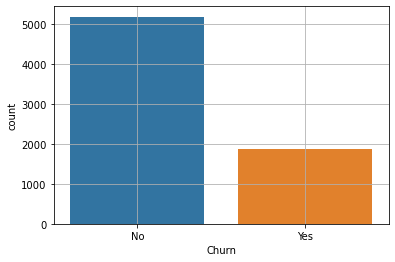

In [16]:
# Count plot for visualization from seaborn
sb.countplot(x="Churn", data=data)
plt.grid()
plt.show()

**Observations**
* Our data is slightly imbalance then we have choose matrix correctly

#### With Gender

In [17]:
# Make a group of Churn based on the gender column
x = data.groupby(["Churn"])["gender"].value_counts()
x

Churn  gender
No     Male      2625
       Female    2549
Yes    Female     939
       Male       930
Name: gender, dtype: int64

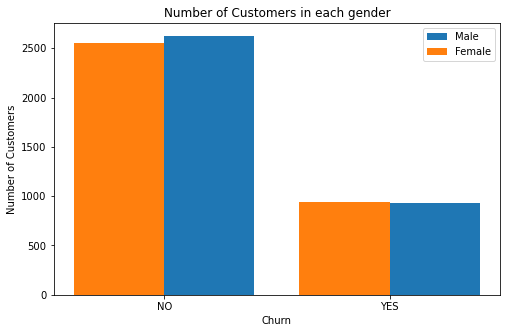

In [18]:
# Setting figure size
plt.figure(figsize=(8,5))

# Make a list to give x-axis name
name = ['NO','YES']

# Getting values from x which contain value count for each category 
male = [x[0],x[3]]
female = [x[1],x[2]]

# get length of name array and set it to the x axis
x_axis = np.arange(len(name))

# Plot bars
plt.bar(x_axis + 0.2, male, 0.4, label = 'Male')
plt.bar(x_axis - 0.2, female, 0.4, label = 'Female')

# Setting name to x axis
plt.xticks(x_axis, name)

# Set x-axis label
plt.xlabel("Churn")

# Set y-axis label
plt.ylabel("Number of Customers")

# set title
plt.title("Number of Customers in each gender")

# TO set legend on the plot for better understandings
plt.legend()

# Finally show the plot
plt.show()

**Observation**
* Here both genders(Male and Female) have same tendency to Churn.

#### With Senior Citizen

In [19]:
# Make a group of Churn based on the SeniorCitizen column
x = data.groupby(["Churn"])["SeniorCitizen"].value_counts()
x

Churn  SeniorCitizen
No     0                4508
       1                 666
Yes    0                1393
       1                 476
Name: SeniorCitizen, dtype: int64

**Here we have SeniorCitizen in the form of binary 0 and 1 first convert this to yes and no for more understanding**

In [20]:
data["SeniorCitizen"]= data["SeniorCitizen"].map({1: "Yes", 0: "No"})
data.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [21]:
# Make a group of Churn based on the SeniorCitizen column
x = data.groupby(["Churn"])["SeniorCitizen"].value_counts()
x

Churn  SeniorCitizen
No     No               4508
       Yes               666
Yes    No               1393
       Yes               476
Name: SeniorCitizen, dtype: int64

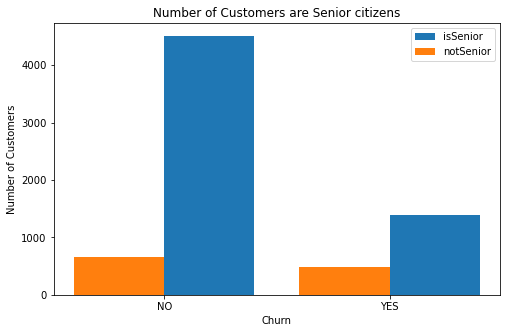

In [22]:
# Setting figure size
plt.figure(figsize=(8,5))

# Make a list to give x-axis name
name = ['NO','YES']

# Getting values from x which contain value count for each category 
isSenior = [x[0],x[2]]
notSenior = [x[1],x[3]]

# get length of name array and set it to the x axis
x_axis = np.arange(len(name))

# Plot bars
plt.bar(x_axis + 0.2, isSenior, 0.4, label = 'isSenior')
plt.bar(x_axis - 0.2, notSenior, 0.4, label = 'notSenior')

# Setting name to x axis
plt.xticks(x_axis, name)

# Set x-axis label
plt.xlabel("Churn")

# Set y-axis label
plt.ylabel("Number of Customers")

# set title
plt.title("Number of Customers are Senior citizens")

# TO set legend on the plot for better understandings
plt.legend()

# Finally show the plot
plt.show()

In [23]:
# Percentage of senior citizens churn
print("Percentage churn of senior citizens: ",format((476/666)*100, ".2f"),"%")

Percentage churn of senior citizens:  71.47 %


**Observation**
* Senior Citizens are most likely to churn around 71.5% senior citizens will churn.

#### With Partner, Dependents, PhoneService, and PaperlessBilling

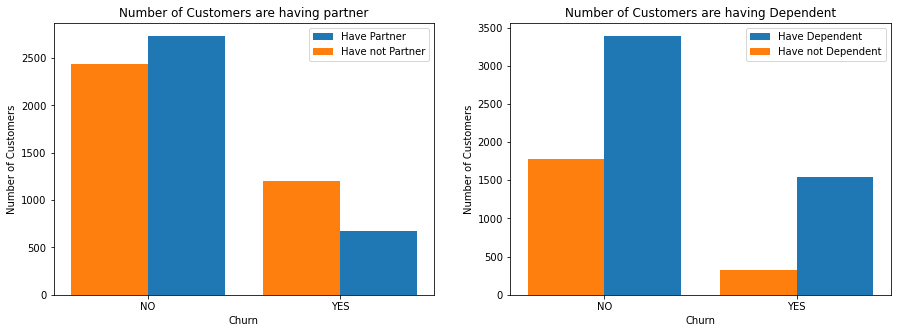

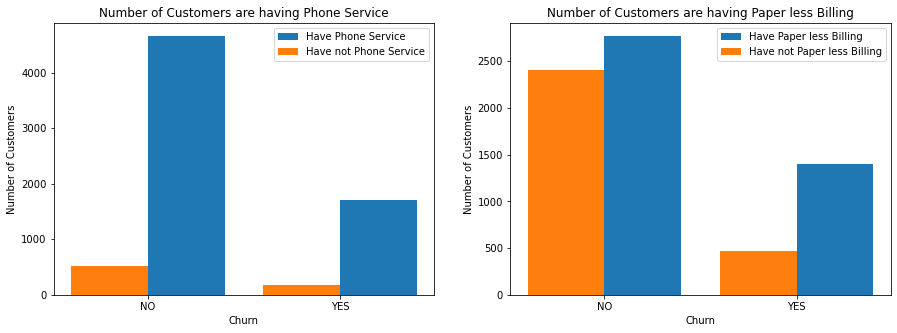

In [24]:
plt.figure(figsize=(15,5))

plt.subplot(121)
x = data.groupby(["Churn"])["Partner"].value_counts()
name = ['NO','YES']
havePartner = [x[0],x[3]]
havenotPartner = [x[1],x[2]]
x_axis = np.arange(len(name))
plt.bar(x_axis + 0.2, havePartner, 0.4, label = 'Have Partner')
plt.bar(x_axis - 0.2, havenotPartner, 0.4, label = 'Have not Partner')
plt.xticks(x_axis, name)
plt.xlabel("Churn")
plt.ylabel("Number of Customers")
plt.title("Number of Customers are having partner")
plt.legend()

plt.subplot(122)
x = data.groupby(["Churn"])["Dependents"].value_counts()
name = ['NO','YES']
haveDependent = [x[0],x[2]]
havenotDependent = [x[1],x[3]]
x_axis = np.arange(len(name))
plt.bar(x_axis + 0.2, haveDependent, 0.4, label = 'Have Dependent')
plt.bar(x_axis - 0.2, havenotDependent, 0.4, label = 'Have not Dependent')
plt.xticks(x_axis, name)
plt.xlabel("Churn")
plt.ylabel("Number of Customers")
plt.title("Number of Customers are having Dependent")
plt.legend()
plt.show()


plt.figure(figsize=(15,5))

x = data.groupby(["Churn"])["PhoneService"].value_counts()
plt.subplot(121)
name = ['NO','YES']
havePhoneService = [x[0],x[2]]
havenotPhoneService = [x[1],x[3]]
x_axis = np.arange(len(name))
plt.bar(x_axis + 0.2, havePhoneService, 0.4, label = 'Have Phone Service')
plt.bar(x_axis - 0.2, havenotPhoneService, 0.4, label = 'Have not Phone Service')
plt.xticks(x_axis, name)
plt.xlabel("Churn")
plt.ylabel("Number of Customers")
plt.title("Number of Customers are having Phone Service")
plt.legend()

x = data.groupby(["Churn"])["PaperlessBilling"].value_counts()
plt.subplot(122)
name = ['NO','YES']
PaperlessBilling = [x[0],x[2]]
notPaperlessBilling = [x[1],x[3]]
x_axis = np.arange(len(name))
plt.bar(x_axis + 0.2, PaperlessBilling, 0.4, label = 'Have Paper less Billing')
plt.bar(x_axis - 0.2, notPaperlessBilling, 0.4, label = 'Have not Paper less Billing')
plt.xticks(x_axis, name)
plt.xlabel("Churn")
plt.ylabel("Number of Customers")
plt.title("Number of Customers are having Paper less Billing")
plt.legend()
plt.show()

**Observation**
* Customers having **not any partner** are more likely to churn
* Customers **having dependents** are more likely to churn
* Most of the user **have phone service** and they are likely to churn
* Customers **with Paperless billing** are more likely to churn

#### With InternetService type

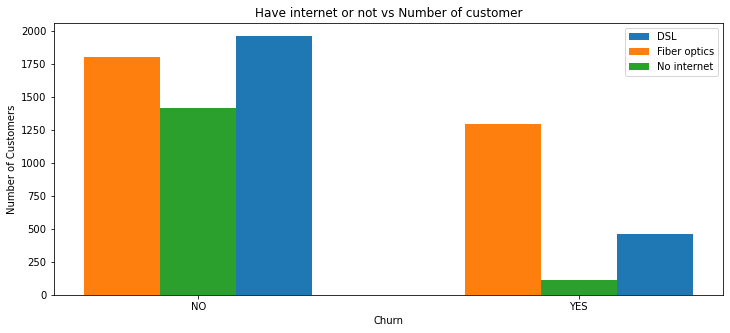

In [25]:
x = data.groupby(["Churn"])["InternetService"].value_counts()
plt.figure(figsize=(12,5))
name = ['NO','YES']
DSL = [x[0],x[4]]
Fiber = [x[1],x[3]]
No = [x[2],x[5]]
x_axis = np.arange(len(name))
plt.bar(x_axis + 0.2, DSL, 0.2, label = 'DSL')
plt.bar(x_axis - 0.2, Fiber, 0.2, label = 'Fiber optics')
plt.bar(x_axis - 0.0, No, 0.2, label = 'No internet')
plt.xticks(x_axis, name)
plt.xlabel("Churn")
plt.ylabel("Number of Customers")
plt.title("Have internet or not vs Number of customer")
plt.legend()
plt.show()

In [26]:
# Percentage of churn with fiber optics internetservice
print("Percentage churn of fiber optics internetservice: ",format((1297/1799)*100, ".2f"),"%")

Percentage churn of fiber optics internetservice:  72.10 %


**Observations**
* Here we can clearly see that more people are likely churn who have **fiber optics** internet service
* Almost 72% customer will churn with fiber optics service

#### With Online Security, Online Backup, Tech Support, Device Protection and Payment Mentods

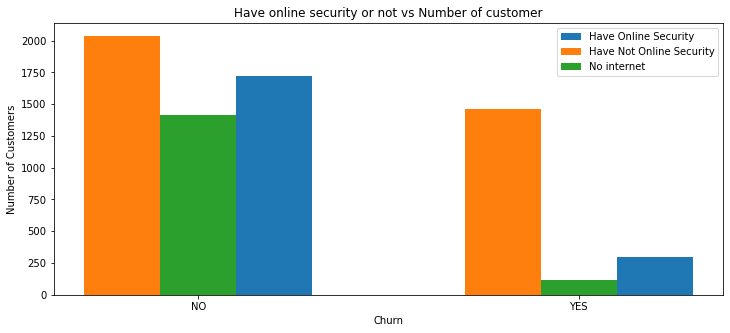

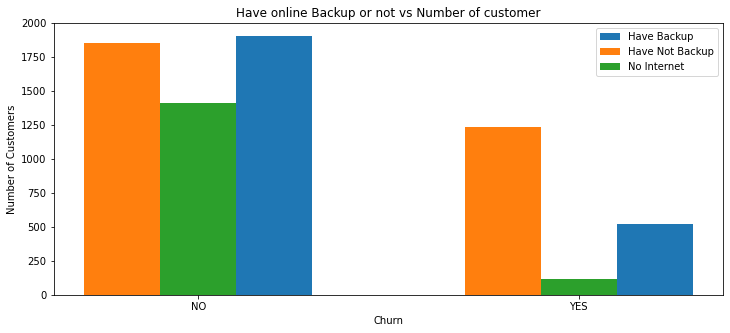

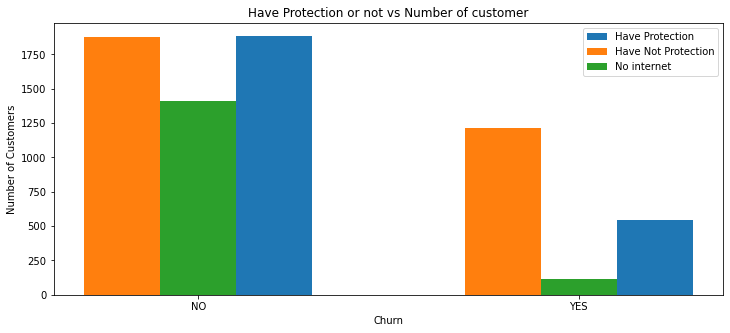

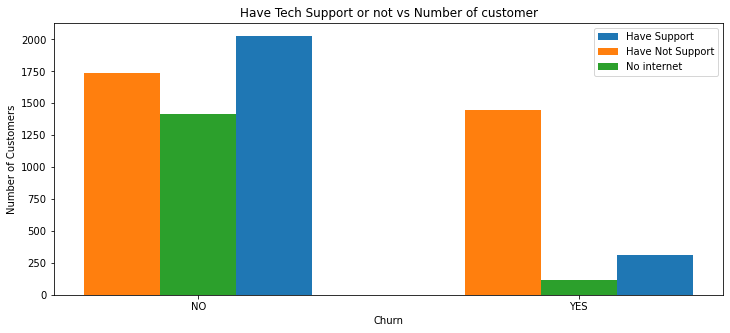

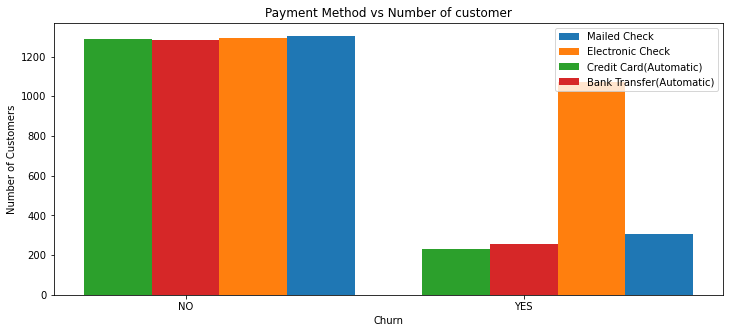

In [27]:
x = data.groupby(["Churn"])["OnlineSecurity"].value_counts()
plt.figure(figsize=(12,5))
name = ['NO','YES']
HaveOnlineSecurity = [x[1],x[4]]
HaveNotOnlineSecurity  = [x[0],x[3]]
NoInternet = [x[2],x[5]]
x_axis = np.arange(len(name))
plt.bar(x_axis + 0.2, HaveOnlineSecurity, 0.2, label = 'Have Online Security')
plt.bar(x_axis - 0.2, HaveNotOnlineSecurity, 0.2, label = 'Have Not Online Security')
plt.bar(x_axis - 0.0, NoInternet, 0.2, label = 'No internet')
plt.xticks(x_axis, name)
plt.xlabel("Churn")
plt.ylabel("Number of Customers")
plt.title("Have online security or not vs Number of customer")
plt.legend()
plt.show()

x = data.groupby(["Churn"])["OnlineBackup"].value_counts()
plt.figure(figsize=(12,5))
name = ['NO','YES']
HaveBackup = [x[0],x[4]]
HaveNotBackup = [x[1],x[3]]
NoInternet = [x[2],x[5]]
x_axis = np.arange(len(name))
plt.bar(x_axis + 0.2, HaveBackup, 0.2, label = 'Have Backup')
plt.bar(x_axis - 0.2, HaveNotBackup, 0.2, label = 'Have Not Backup')
plt.bar(x_axis - 0.0, NoInternet, 0.2, label = 'No Internet')
plt.xticks(x_axis, name)
plt.xlabel("Churn")
plt.ylabel("Number of Customers")
plt.title("Have online Backup or not vs Number of customer")
plt.legend()
plt.show()

x = data.groupby(["Churn"])["DeviceProtection"].value_counts()
plt.figure(figsize=(12,5))
name = ['NO','YES']
HaveProtection = [x[0],x[4]]
HaveNotProtection = [x[1],x[3]]
NoInternet = [x[2],x[5]]
x_axis = np.arange(len(name))
plt.bar(x_axis + 0.2, HaveProtection, 0.2, label = 'Have Protection')
plt.bar(x_axis - 0.2, HaveNotProtection, 0.2, label = 'Have Not Protection')
plt.bar(x_axis - 0.0, NoInternet, 0.2, label = 'No internet')
plt.xticks(x_axis, name)
plt.xlabel("Churn")
plt.ylabel("Number of Customers")
plt.title("Have Protection or not vs Number of customer")
plt.legend()
plt.show()

x = data.groupby(["Churn"])["TechSupport"].value_counts()
plt.figure(figsize=(12,5))
HaveSupport = [x[0],x[4]]
HaveNotSupport = [x[1],x[3]]
NoInternet = [x[2],x[5]]
x_axis = np.arange(len(name))
plt.bar(x_axis + 0.2, HaveSupport, 0.2, label = 'Have Support')
plt.bar(x_axis - 0.2, HaveNotSupport, 0.2, label = 'Have Not Support')
plt.bar(x_axis - 0.0, NoInternet, 0.2, label = 'No internet')
plt.xticks(x_axis, name)
plt.xlabel("Churn")
plt.ylabel("Number of Customers")
plt.title("Have Tech Support or not vs Number of customer")
plt.legend()
plt.show()

x = data.groupby(["Churn"])["PaymentMethod"].value_counts()
plt.figure(figsize=(12,5))
name = ['NO','YES']
MailedCheck = [x[0],x[5]]
ElectronicCheck = [x[1],x[4]]
CreditCard = [x[2],x[7]]
BankTransfer = [x[3],x[6]]
x_axis = np.arange(len(name))
plt.bar(x_axis + 0.4, MailedCheck, 0.2, label = 'Mailed Check')
plt.bar(x_axis + 0.2, ElectronicCheck, 0.2, label = 'Electronic Check')
plt.bar(x_axis - 0.2, CreditCard, 0.2, label = 'Credit Card(Automatic)')
plt.bar(x_axis - 0.0, BankTransfer, 0.2, label = 'Bank Transfer(Automatic)')
plt.xticks(x_axis, name)
plt.xlabel("Churn")
plt.ylabel("Number of Customers")
plt.title("Payment Method vs Number of customer")
plt.legend()
plt.show()

**Observation**
* Customers who have internet service and **not** opting for the **Online Backups, Tech Support, Device Protection, and online Security** are more likely to churn with large percentage
* And Customers with **Electronic Check** payment menthod are more likely to churn also with a large percentage.

#### With Tenure 

Text(0.5, 1.0, 'Distribution of Tenure by churn')

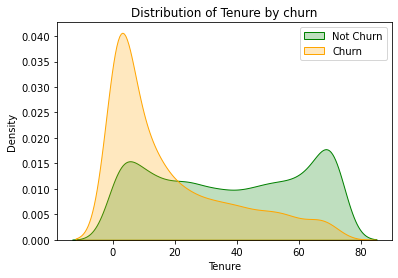

In [28]:
# Regerence: https://www.geeksforgeeks.org/kde-plot-visualization-with-pandas-and-seaborn/
# This is to plot Distribution of the tenure with respect to churn
sb.kdeplot(data.loc[(data["Churn"] == 'No'),"tenure" ],color="Green", shade = True,Label='Not Churn')
sb.kdeplot(data.loc[(data["Churn"] == 'Yes'),"tenure" ],color="orange", shade= True, Label = "Churn")
plt.legend()
plt.ylabel('Density')
plt.xlabel('Tenure')
plt.title('Distribution of Tenure by churn')

**Observation**
* Some people churn in the starting phase of there subscription

Text(0.5, 1.0, 'Distribution of monthly charges by churn')

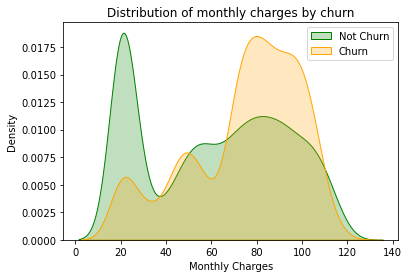

In [29]:
# Regerence: https://www.geeksforgeeks.org/kde-plot-visualization-with-pandas-and-seaborn/
# This is to plot Distribution of the Montyl charge with respect to churn
sb.kdeplot(data.loc[(data["Churn"] == 'No'),"MonthlyCharges" ],color="Green", shade = True,Label='Not Churn')
sb.kdeplot(data.loc[(data["Churn"] == 'Yes'),"MonthlyCharges" ],color="orange", shade= True, Label = "Churn")
plt.legend()
plt.ylabel('Density')
plt.xlabel('Monthly Charges')
plt.title('Distribution of monthly charges by churn')

**Observations**
* Customers with **higher Monthly Charges** are more likely to churn

Text(0.5, 1.0, 'Distribution of Total Charges by churn')

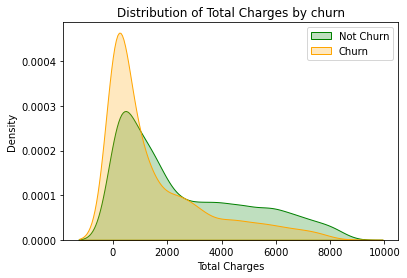

In [30]:
# Regerence: https://www.geeksforgeeks.org/kde-plot-visualization-with-pandas-and-seaborn/
# This is to plot Distribution of the total charge with respect to churn
sb.kdeplot(data.loc[(data["Churn"] == 'No'),"TotalCharges" ],color="Green", shade = True,Label='Not Churn')
sb.kdeplot(data.loc[(data["Churn"] == 'Yes'),"TotalCharges" ],color="orange", shade= True, Label = "Churn")
plt.legend()
plt.ylabel('Density')
plt.xlabel('Total Charges')
plt.title('Distribution of Total Charges by churn')

**Observations**
* Not any usefull results

### Results 
After complete analysis we found that these features ‘customerID’,’gender’,’PhoneService’ are not important.

### Checking for Outliers 

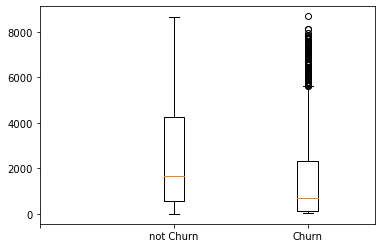

In [31]:
# Box plot to check outlier for total charges
boxData = [data.loc[(data["Churn"] == 'No'),"TotalCharges" ],data.loc[(data["Churn"] == 'Yes'),"TotalCharges" ]]
plt.boxplot(boxData)
name = ['','not Churn',"Churn"]
x_axis = np.arange(len(name))
plt.xticks(x_axis, name)
plt.show()

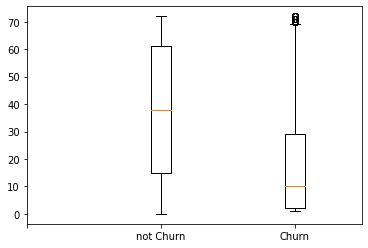

In [32]:
# Box plot to check outlier for tenure
boxData = [data.loc[(data["Churn"] == 'No'),"tenure" ],data.loc[(data["Churn"] == 'Yes'),"tenure" ]]
plt.boxplot(boxData)
name = ['','not Churn',"Churn"]
x_axis = np.arange(len(name))
plt.xticks(x_axis, name)
plt.show()

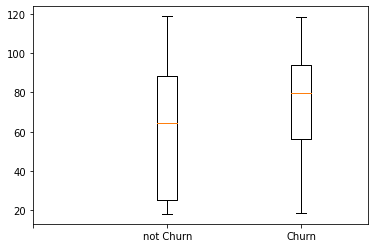

In [33]:
# Box plot to check outlier for monthly charges
boxData = [data.loc[(data["Churn"] == 'No'),"MonthlyCharges" ],data.loc[(data["Churn"] == 'Yes'),"MonthlyCharges" ]]
plt.boxplot(boxData)
name = ['','not Churn',"Churn"]
x_axis = np.arange(len(name))
plt.xticks(x_axis, name)
plt.show()

**Observation**
* We have some outlier in Total Charges and Tenure columns 

### Encoding and mapping to make then in the numeric form 

#### For Binary Feature 

In [34]:
# For binary features we can map 
data["gender"]= data["gender"].map({"Male":1, "Female":0})
data["SeniorCitizen"]= data["SeniorCitizen"].map({"Yes":1, "No":0})
data["Partner"]= data["Partner"].map({"Yes":1, "No":0})
data["Dependents"]= data["Dependents"].map({"Yes":1, "No":0})
data["PhoneService"]= data["PhoneService"].map({"Yes":1, "No":0})
data["PaperlessBilling"]= data["PaperlessBilling"].map({"Yes":1, "No":0})
data["Churn"]= data["Churn"].map({"Yes":1, "No":0})

#### One Hot encoding for categorical features

In [35]:
# One hot encoding for Multiple phone lines
data = pd.concat([data, pd.get_dummies(data.MultipleLines, prefix='MultipleLines')], axis=1)
data.drop("MultipleLines", inplace=True,axis=1)

# One hot encoding for internet service
data = pd.concat([data, pd.get_dummies(data.InternetService, prefix='InternetService')], axis=1)
data.drop("InternetService", inplace=True,axis=1)

# One hot encoding for OnlineSecurity
data = pd.concat([data, pd.get_dummies(data.OnlineSecurity, prefix='OnlineSecurity')], axis=1)
data.drop("OnlineSecurity", inplace=True,axis=1)

# One hot encoding for OnlineBackup
data = pd.concat([data, pd.get_dummies(data.OnlineBackup, prefix='OnlineBackup')], axis=1)
data.drop("OnlineBackup", inplace=True,axis=1)

# One hot encoding for DeviceProtection
data = pd.concat([data, pd.get_dummies(data.DeviceProtection, prefix='DeviceProtection')], axis=1)
data.drop("DeviceProtection", inplace=True,axis=1)

# One hot encoding for TechSupport
data = pd.concat([data, pd.get_dummies(data.TechSupport, prefix='TechSupport')], axis=1)
data.drop("TechSupport", inplace=True,axis=1)

# One hot encoding for StreamingTV
data = pd.concat([data, pd.get_dummies(data.StreamingTV, prefix='StreamingTV')], axis=1)
data.drop("StreamingTV", inplace=True,axis=1)

# One hot encoding for StreamingMovies
data = pd.concat([data, pd.get_dummies(data.StreamingMovies, prefix='StreamingMovies')], axis=1)
data.drop("StreamingMovies", inplace=True,axis=1)

# One hot encoding for Contract
data = pd.concat([data, pd.get_dummies(data.Contract, prefix='Contract')], axis=1)
data.drop("Contract", inplace=True,axis=1)

# One hot encoding for PaymentMethod
data = pd.concat([data, pd.get_dummies(data.PaymentMethod, prefix='PaymentMethod')], axis=1)
data.drop("PaymentMethod", inplace=True,axis=1)

### Cheking for multicolinearity

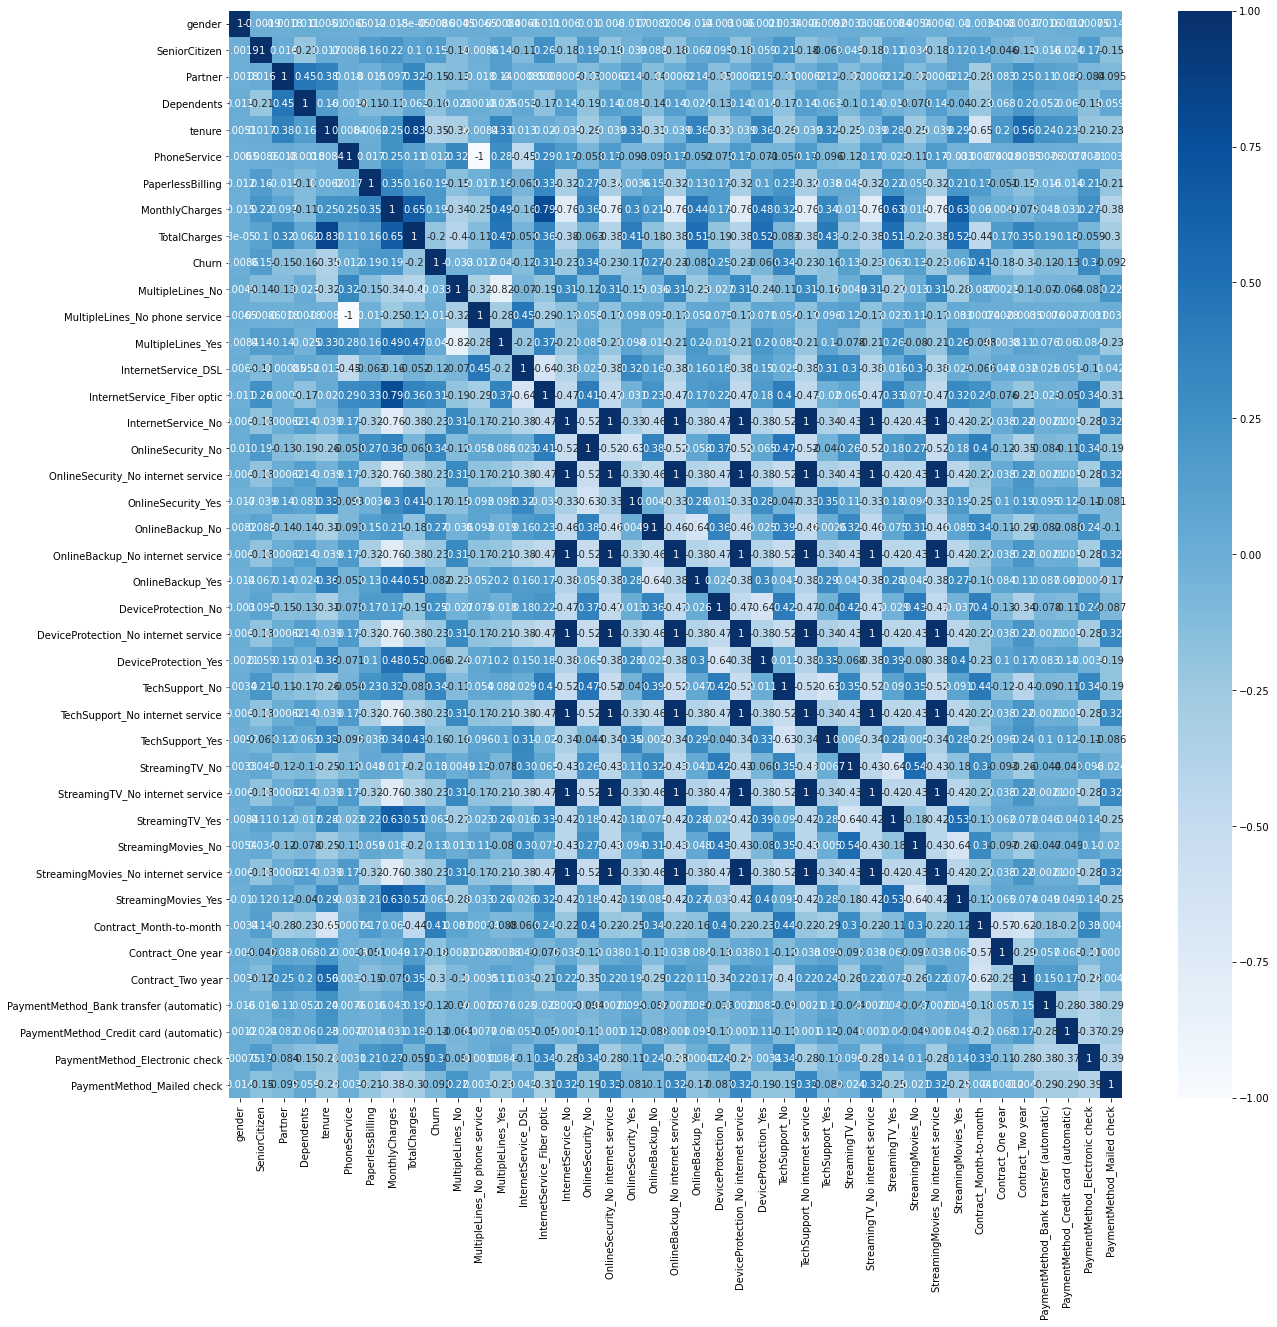

In [36]:
plt.figure(figsize=(20,20))
corr = data.corr()
# plot the heatmap
sb.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,cmap="Blues",annot=True)
plt.show()

**Observations**
* As we can see that dark blues with values one are correlated to each others so we will drop one of them.

In [37]:
correlated_features = ["OnlineSecurity_No internet service","OnlineBackup_No internet service",
                       "DeviceProtection_No internet service","TechSupport_No internet service",
                      "StreamingTV_No internet service","StreamingMovies_No internet service"]
data.drop(correlated_features,inplace=True,axis=1)

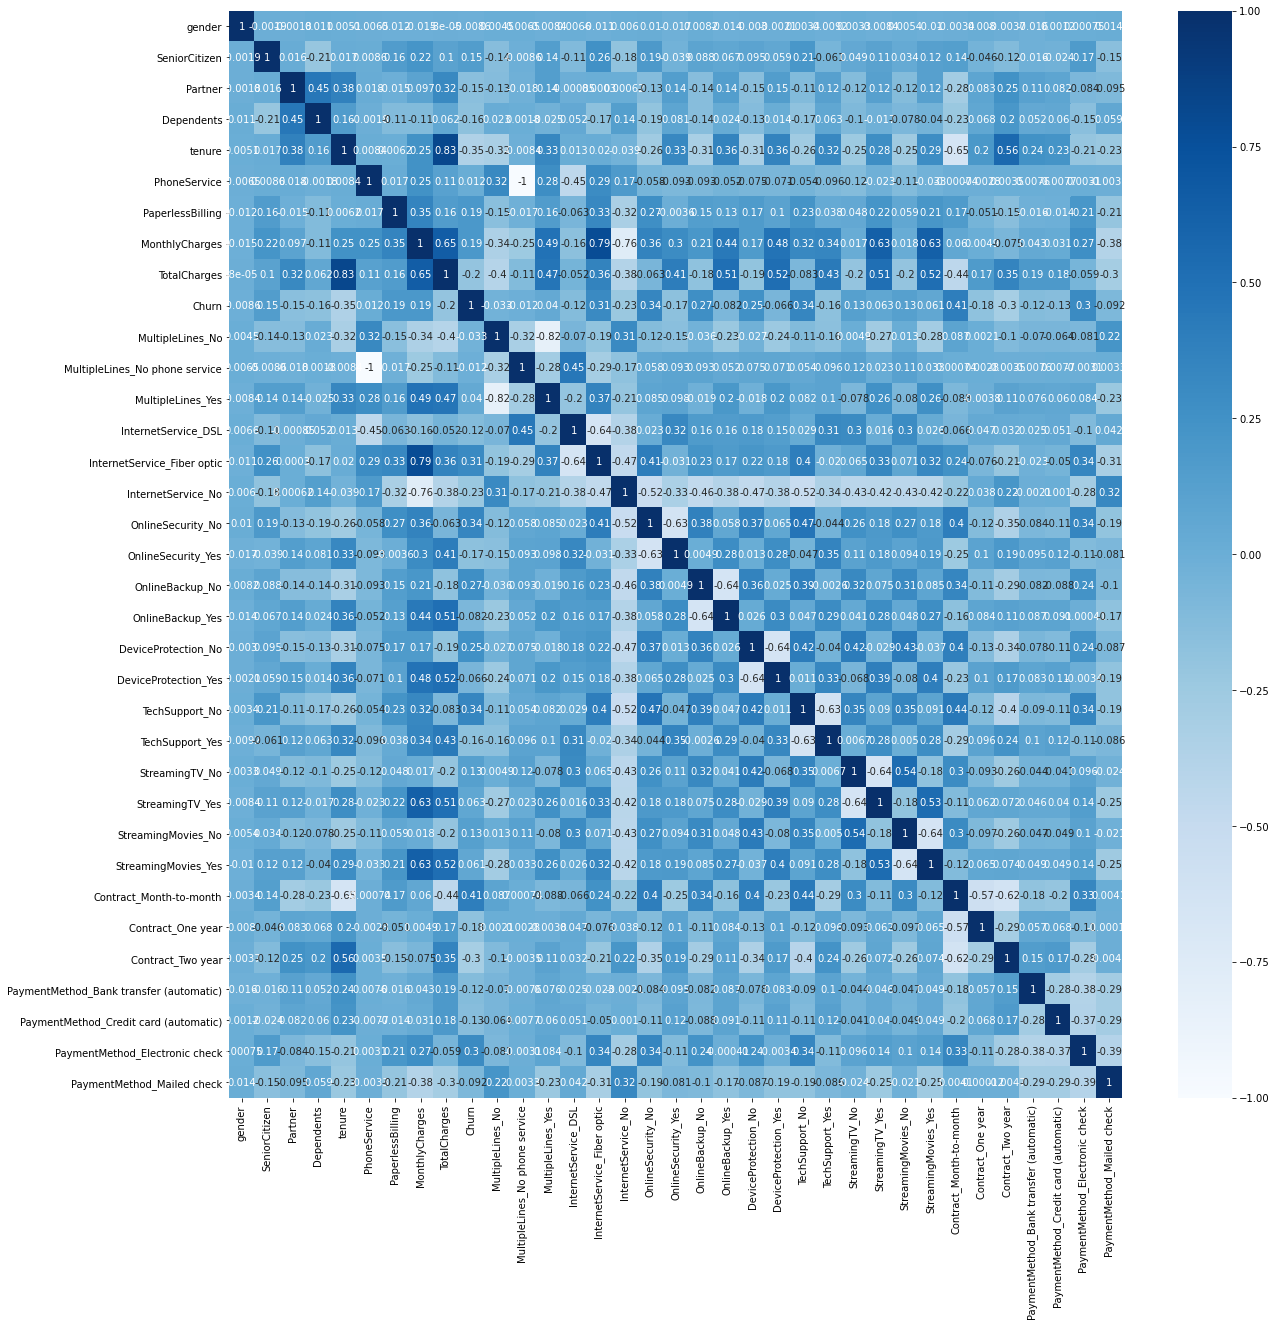

In [38]:
# After dropping all co linear features
plt.figure(figsize=(20,20))
corr = data.corr()
# plot the heatmap
sb.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,cmap="Blues",annot=True)
plt.show()

### Feature selection 

In [39]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split

# To get most important feature we apply Chi square test on it.
y = data["Churn"]
data.drop(["Churn"],axis=1,inplace=True)

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=34)
fit = bestfeatures.fit(data,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(data.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
print(featureScores.nlargest(34,'Score'))

                                      Specs          Score
8                              TotalCharges  624292.003004
4                                    tenure   16278.923685
7                            MonthlyCharges    3680.787699
27                  Contract_Month-to-month     519.895311
29                        Contract_Two year     488.578090
32           PaymentMethod_Electronic check     426.422767
15                        OnlineSecurity_No     416.182917
21                           TechSupport_No     406.117093
13              InternetService_Fiber optic     374.476216
14                       InternetService_No     286.520193
17                          OnlineBackup_No     284.074903
19                      DeviceProtection_No     251.672514
28                        Contract_One year     176.123171
16                       OnlineSecurity_Yes     147.295858
22                          TechSupport_Yes     135.559783
1                             SeniorCitizen     134.3515

**Observation**
* As we Have applied CHI-SQUARE test to find important features then we found total charges, monthly charges, tenure, Payment Method electronic, Dependents, online security and many more are most important features.

## References
* https://www.kdnuggets.com/2019/05/churn-prediction-machine-learning.html
* https://en.wikipedia.org/
* https://www.geeksforgeeks.org/
* https://pandas.pydata.org/docs/index.html

# Thank You